In [2]:
import numpy as np
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy
import colorcet
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')   

plt.style.use('paper.mplstyle')

In [3]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

file_mus = '%s/data_hstha/ngc5068/muse/NGC5068-1.04asec_MAPS.fits' %root_dir 
file_hst = '%s/data_hstha/ngc5068/hst_contsub/ngc5068_hst_ha_sic.fits' %root_dir 
file_hstcat = '%s/data_hstha_nebulae_catalogue/ngc5068/dendro/ngc5068_trunk_close_mask.fits' %root_dir 
file_muscat = '%s/data_hstha/ngc5068/muse/NGC5068_nebmask.fits' %root_dir 

hdu_mus = fits.open(file_mus)['HA6562_FLUX']
hdu_hst = fits.open(file_hst)[0]
hdu_hstcat = fits.open(file_hstcat)[0]
hdu_muscat = fits.open(file_muscat)[0]

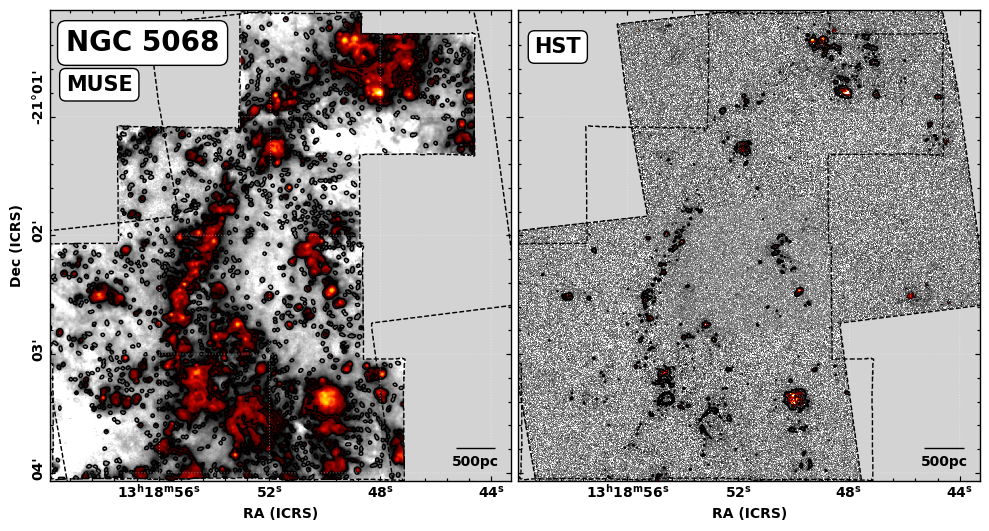

In [4]:
cmap1 = plt.cm.binary(np.linspace(0., 1, 64))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))

l = 199.715
b = -21.0347783
width = 0.0648023
height = 0.0661847


fig = plt.figure(figsize=(10, 10)) 

ax1 = aplpy.FITSFigure(hdu_mus, figure=fig, subplot=(1,2,1))
ax2 = aplpy.FITSFigure(hdu_hst, figure=fig, subplot=(1,2,2))

vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [5, 99.99])
vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.99])

ax1.show_colorscale(cmap=cmap, stretch='log', vmin=vmin1, vmax=vmax1)
ax2.show_colorscale(cmap=cmap, stretch='sqrt', vmin=vmin2, vmax=vmax2)

ax1.show_contour(hdu_muscat, levels=[0], colors='black', linewidths=1)
ax2.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1)

hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
ax1.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')
ax2.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
ax1.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')
ax2.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

ax1.recenter(l, b, width=width, height=height)
ax2.recenter(l, b, width=width, height=height)

ax2.axis_labels.hide_y()
ax2.tick_labels.hide_y()

ax1.add_label(0.035, 0.90, 'NGC 5068', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=20, ha='left', va='bottom')
ax1.add_label(0.035, 0.82, 'MUSE', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='bottom')
ax2.add_label(0.035, 0.90, 'HST', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='bottom')

for ax in [ax1, ax2]:

    ax.set_nan_color('lightgrey')
    ax.ticks.set_color('black')

    ax.add_scalebar(500/(5.2e6/206265)*u.arcsec, corner='bottom right')
    ax.scalebar.set_label('500pc')

for i, ax in enumerate(fig.get_axes()):

    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.35, ls=':', color='white')
    axes[i].set_facecolor('lightgrey')

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/maps_hstmuse_ngc5068.pdf', dpi=250, bbox_inches='tight')

In [5]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

file_mus = '%s/data_hstha/ngc4303/muse/NGC4303-0.78asec_MAPS.fits' %root_dir 
file_hst = '%s/data_hstha/ngc4303/hst_contsub/ngc4303_hst_ha_sic.fits' %root_dir 
file_hstcat = '%s/data_hstha_nebulae_catalogue/ngc4303/dendro/ngc4303_trunk_close_mask.fits' %root_dir 
file_muscat = '%s/data_hstha/ngc4303/muse/NGC4303_nebmask.fits' %root_dir 

hdu_mus = fits.open(file_mus)['HA6562_FLUX']
hdu_hst = fits.open(file_hst)[0]
hdu_hstcat = fits.open(file_hstcat)[0]
hdu_muscat = fits.open(file_muscat)[0]

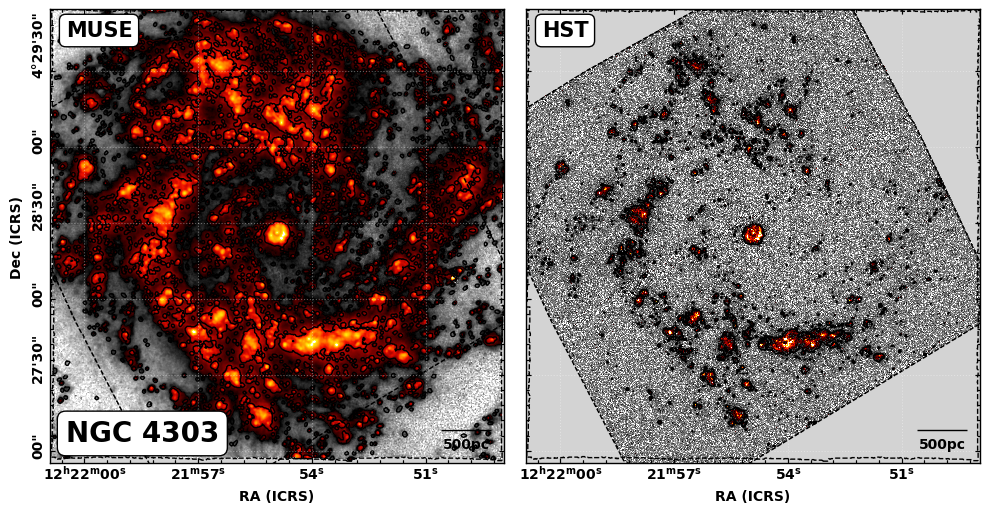

In [6]:
cmap1 = plt.cm.binary(np.linspace(0., 1, 64))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))

l = 185.4788502
b = 4.4735120
width = 0.0248782*2.0
height = 0.0248782*2.0

fig = plt.figure(figsize=(10, 10)) 

ax1 = aplpy.FITSFigure(hdu_mus, figure=fig, subplot=(1,2,1))
ax2 = aplpy.FITSFigure(hdu_hst, figure=fig, subplot=(1,2,2))

vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.99])
vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.95])

ax1.show_colorscale(cmap=cmap, stretch='log', vmin=vmin1, vmax=vmax1)
ax2.show_colorscale(cmap=cmap, stretch='sqrt', vmin=vmin2, vmax=vmax2)

ax1.show_contour(hdu_muscat, levels=[0], colors='black', linewidths=1)
ax2.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1)

hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
ax1.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')
ax2.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
ax1.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')
ax2.show_contour(hdu_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

ax1.recenter(l, b, width=width, height=height)
ax2.recenter(l, b, width=width, height=height)

ax2.axis_labels.hide_y()
ax2.tick_labels.hide_y()

ax1.add_label(0.035, 0.035, 'NGC 4303', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=20, ha='left', va='bottom')
ax1.add_label(0.035, 0.975, 'MUSE', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
ax2.add_label(0.035, 0.975, 'HST', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')

for ax in [ax1, ax2]:

    ax.set_nan_color('lightgrey')
    ax.ticks.set_color('black')

    ax.add_scalebar(500/(5.2e6/206265)*u.arcsec, corner='bottom right')
    ax.scalebar.set_label('500pc')

for i, ax in enumerate(fig.get_axes()):

    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.35, ls=':', color='white')
    axes[i].set_facecolor('lightgrey')

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/maps_hstmuse_ngc4303.pdf', dpi=250, bbox_inches='tight', transparent=True)

In [7]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D

def get_croppeddata(hdu, ra, dec, width, height):
    """
    Function to crop data from an HDU object based on the provided region properties.

    Parameters:
        hdu (astropy.io.fits.ImageHDU): The input HDU object.
        i (int): Index of the region in the regions dictionary.
        regions (dict): Dictionary containing region properties.

    Returns:
        astropy.io.fits.ImageHDU: The cropped HDU object.
    """
    
    hdu_crop = hdu.copy()  # Copy the HDU object to avoid modifying the original data
    wcs = WCS(hdu_crop)  # Create a WCS object from the HDU header

    centre = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')  # Create a SkyCoord object for the center of the region
    cutout = Cutout2D(hdu_crop.data, centre, [width*u.deg*1.2, height*u.deg*1.2], wcs=wcs)  # Create a rectangular cutout
    hdu_crop = fits.PrimaryHDU(cutout.data, cutout.wcs.to_header())
    
    del hdu 
    del cutout  # Delete the cutout to free up memory

    return hdu_crop  # Return the cropped HDU object

In [8]:
from itertools import cycle

cmap1 = plt.cm.binary(np.linspace(0., 1, 64))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))

centres_x = [185.4787857, 185.4664008, 185.4729928, 185.4856822, 185.4860565]
centres_y = [4.4738469, 4.4607519, 4.4807053, 4.4754216, 4.4831038]
widths = heights = [0.0015, 0.00075, 0.00095, 0.0007, 0.0006]

fig = plt.figure(figsize=(10, 4)) 

for i, (centre_x, centre_y, width, height) in enumerate(zip(centres_x, centres_y, widths, heights)):

    hdu_mus_crop = get_croppeddata(hdu_mus, centre_x, centre_y, width*2, height*2)
    hdu_hst_crop = get_croppeddata(hdu_hst, centre_x, centre_y, width*2, height*2)
    hdu_muscat_crop = get_croppeddata(hdu_muscat, centre_x, centre_y, width*2, height*2)
    hdu_hstcat_crop = get_croppeddata(hdu_hstcat, centre_x, centre_y, width*2, height*2)

    ax1 = aplpy.FITSFigure(hdu_mus_crop, figure=fig, subplot=(2,5,i+1))
    ax2 = aplpy.FITSFigure(hdu_hst_crop, figure=fig, subplot=(2,5,i+6))

    vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.99])
    vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.95])

    ax1.show_colorscale(cmap=cmap, stretch='log', vmin=vmin1, vmax=vmax1)
    ax2.show_colorscale(cmap=cmap, stretch='sqrt', vmin=vmin2, vmax=vmax2)

    # ax1.show_contour(hdu_muscat_crop, levels=[0], colors='black', linewidths=1)
    # ax2.show_contour(hdu_hstcat_crop, levels=[0], colors='black', linewidths=1)

    hdu_1 = hdu_muscat_crop.copy()
    hdu_2 = hdu_hstcat_crop.copy()

    for i, level in enumerate(np.unique(hdu_1.data)):    

        hdu_1_ = hdu_1.copy()
        hdu_2_ = hdu_2.copy()

        if level == -1:
            continue
        hdu_1_.data[hdu_1_.data != level] = -1
        hdu_2_.data[hdu_2_.data != level] = -1

        ax1.show_contour(hdu_1_, levels=[0], colors='C%i'%i, linewidths=1)
        ax2.show_contour(hdu_2_, levels=[0], colors='C%i'%i, linewidths=1)
        # ax1.show_contour(hdu_1_, levels=[0], colors='black', linewidths=1)
        # ax2.show_contour(hdu_2_, levels=[0], colors='black', linewidths=1)

    ax1.recenter(centre_x, centre_y, width=width*2, height=height*2)
    ax2.recenter(centre_x, centre_y, width=width*2, height=height*2)

    ax1.axis_labels.hide()
    ax1.tick_labels.hide()
    ax2.axis_labels.hide()
    ax2.tick_labels.hide()

    if i == 0:
        ax1.add_label(0.035, 0.90, 'MUSE', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='bottom')
        ax2.add_label(0.035, 0.90, 'HST', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='bottom')

    for ax in [ax1, ax2]:

        ax.set_nan_color('lightgrey')
        ax.ticks.set_color('black')

        ax.add_scalebar(50/(5.2e6/206265)*u.arcsec, corner='bottom right')
        ax.scalebar.set_label('50pc')

for i, ax in enumerate(fig.get_axes()):

    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.35, ls=':', color='white')
    axes[i].set_facecolor('lightgrey')

fig.tight_layout(h_pad=1, w_pad=0)
plt.savefig('./figs/maps_hstmuse_ngc4303_zoom.pdf', dpi=250, bbox_inches='tight', transparent=True)